In [70]:
from numpy import arange, zeros, exp
import matplotlib.pyplot as plt

In [71]:
C = 100e-12 #F
G = 10e-9   #S

V_r = -70e-3    #V
V_L = -50e-3    #V
delta_L = 2e-3  #V

V_redef = -80e-3    #V
V_pico = 50e-3  #V

tau_u = 200e-3  #s

a = 2e-9    #S
b = 20e-12  #A

dt = 0.001e-3   #s
tmax = 3    #s

N = round(tmax / dt)   # numero de interacoes

In [72]:
def corrente(I, t, ti, tf):
    return  I*(t>=ti)-I*(t>=tf)


def euler(V0, u0, N, I, V_redef, dt):
    V = zeros(N)
    u = zeros(N)

    V[0] = V0
    u[0] = u0

    for i in range(N-1):
        if V[i] >= V_pico:
            V[i+1] = V_redef
            u[i+1] = u[i] + b
        else:
            V[i+1] = V[i] + dt/C * (G*(V_r - V[i]) + G*delta_L*exp( (V[i]-V_L)/delta_L) - u[i] + I[i])
            u[i+1] = u[i] + dt/tau_u * (a * (V[i] - V_r) - u[i])

    return V, u

In [73]:
t = arange(0, tmax, dt)

I_inj = 221e-12 #A
I = corrente(I_inj, t, ti=0.5, tf=2.5)

V0 = V_r
u0 = 0

V, u = euler(V0, u0, N, I, V_redef, dt)

In [74]:
plt.style.use('bmh')

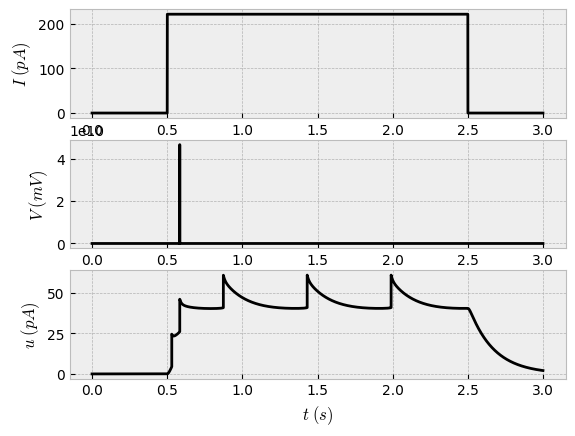

In [76]:
plt.figure()

plt.subplot(3,1,1)
plt.plot(t, I*1e12, 'k')
plt.ylabel(r'$I \; (pA)$')

plt.subplot(3,1,2)
plt.plot(t, V*1e3, 'k')
plt.ylabel(r'$V \; (mV)$')

plt.subplot(3,1,3)
plt.plot(t, u*1e12, 'k')
plt.ylabel(r'$u \; (pA)$')
plt.xlabel(r'$t \; (s)$')

plt.show()